In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Admission_Predict.csv')

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.shape

(400, 9)

In [10]:
#decision tree algo is explicit feature selection algo ie which feature is imp n not
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [12]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [13]:
#x input variable
x= df.drop('Chance of Admit ',axis=1)
#axis=1 shows it is col
y=df['Chance of Admit ']

In [14]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [15]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [16]:
y=y.astype('int')
#change dtype
#y is series ie col is series

In [17]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

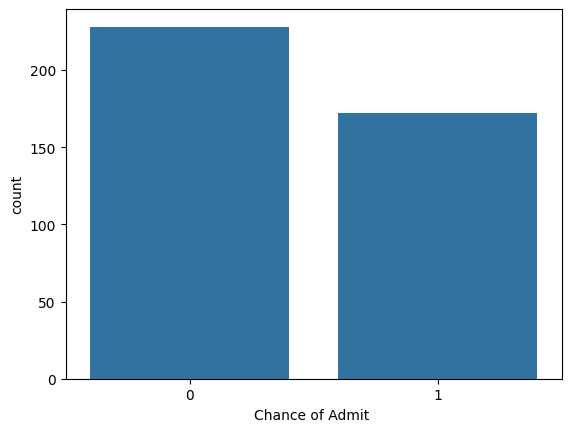

In [19]:
#shows enties in y
import seaborn as sns

sns.countplot(x=y);

In [22]:
y.value_counts()#in numeric form

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [23]:
#data preparation / train test split/ cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.25)

In [24]:
x_train.shape

(300, 8)

In [25]:
x_test.shape

(100, 8)

In [26]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [29]:
#import the class
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [30]:
#model train
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_pred = classifier.predict(x_test)

In [33]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [34]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [36]:
from sklearn.metrics import classification_report
#using we can see prperties like precision , recall ,f1

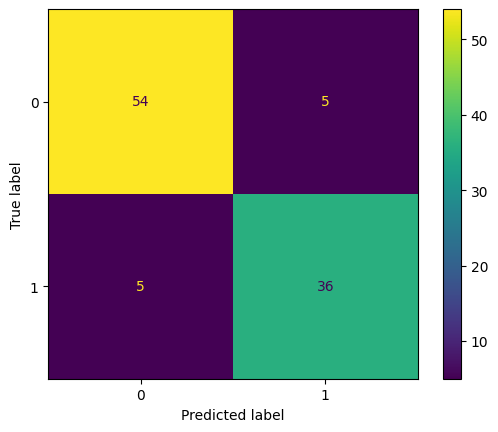

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [39]:
accuracy_score(y_test, y_pred)

0.9

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [43]:
#lets test aur model
new = [[247,316,105,3,3.0,3.5,8.73,0]]
classifier.predict(new)

C:\Users\Sayali\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

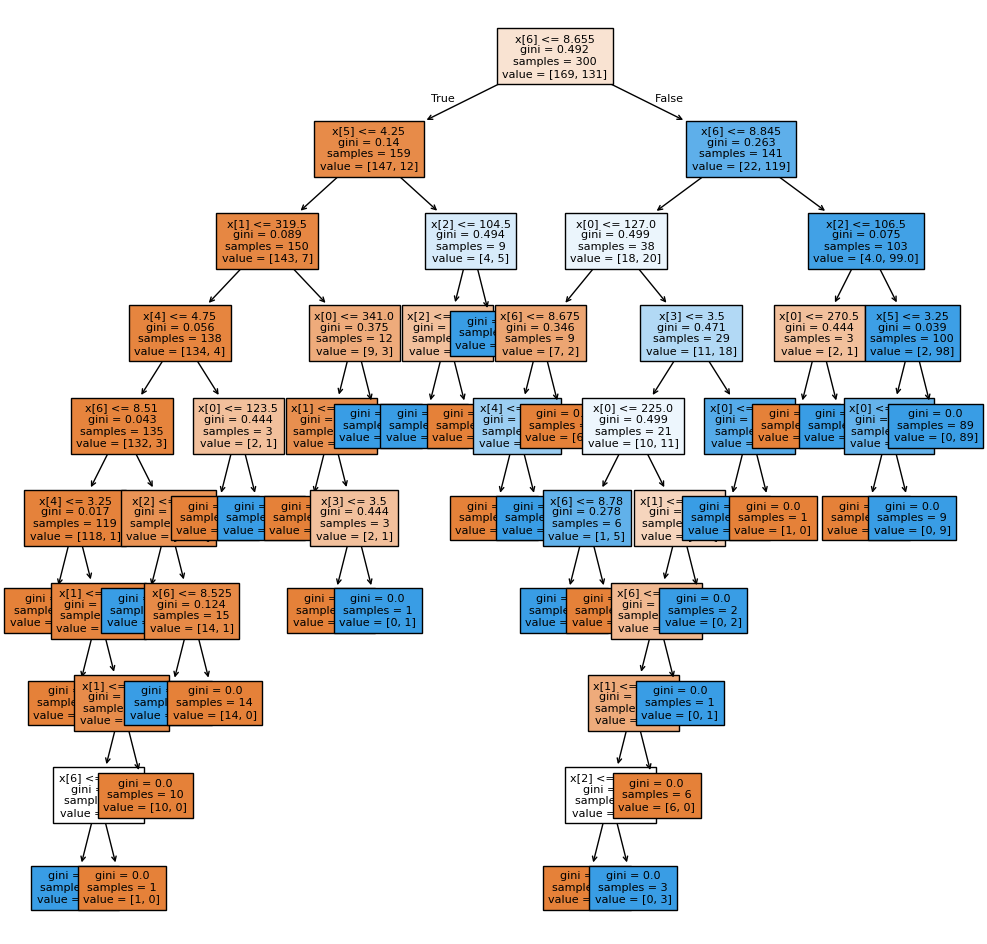

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8, filled=True);